In [1]:
import pandas as pd
import requests

from functools import reduce

import matplotlib.pyplot as plt

import os
import json

In [2]:
MYANIMELIST = 'raw/'

ANIME_CLEAN = 'anime_cleaned.csv'

In [3]:
anime_clean_data = pd.read_csv(os.path.join(MYANIMELIST, ANIME_CLEAN), index_col='title')

In [4]:
anime_clean_data.columns

Index(['anime_id', 'title_english', 'title_japanese', 'title_synonyms',
       'image_url', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'duration_min', 'aired_from_year'],
      dtype='object')

In [5]:
anime_clean_data.genre

title
Inu x Boku SS                                                   Comedy, Supernatural, Romance, Shounen
Seto no Hanayome                                              Comedy, Parody, Romance, School, Shounen
Shugo Chara!! Doki                                                       Comedy, Magic, School, Shoujo
Princess Tutu                                                   Comedy, Drama, Magic, Romance, Fantasy
Bakuman. 3rd Season                                                    Comedy, Drama, Romance, Shounen
                                                                                ...                   
Dokidoki Little Ooyasan                                                                         Hentai
Wo Shi Jiang Xiaobai (2018)                                              Slice of Life, Drama, Romance
Genki Genki Non-tan: Obake Mura Meiro                                                      Music, Kids
Mr. Men Little Miss                                                

In [6]:
# transform genre csv into list
anime_clean_data['genre'] = anime_clean_data.genre.str.split(',')

# remove NANs
anime_clean_data = anime_clean_data[anime_clean_data.genre.notna()]

# change image domain
anime_clean_data['image_url'] = anime_clean_data['image_url'].str.replace('myanimelist.cdn-dena.com', 'cdn.myanimelist.net')

In [7]:
anime_clean_split_genre = anime_clean_data.explode('genre').copy()
anime_clean_split_genre['genre'] = anime_clean_split_genre['genre'].str.strip()

In [8]:
anime_clean_split_top3genre = anime_clean_data.copy()
anime_clean_split_top3genre['genre'] = anime_clean_split_top3genre['genre'].apply(lambda x: x[:3])
anime_clean_split_top3genre = anime_clean_split_top3genre.explode('genre').copy()
anime_clean_split_top3genre['genre'] = anime_clean_split_top3genre['genre'].str.strip()

In [9]:
genres_count = anime_clean_split_genre.genre.value_counts()
genres_count.head()

Comedy       3021
Action       2051
Fantasy      1441
Adventure    1355
Drama        1338
Name: genre, dtype: int64

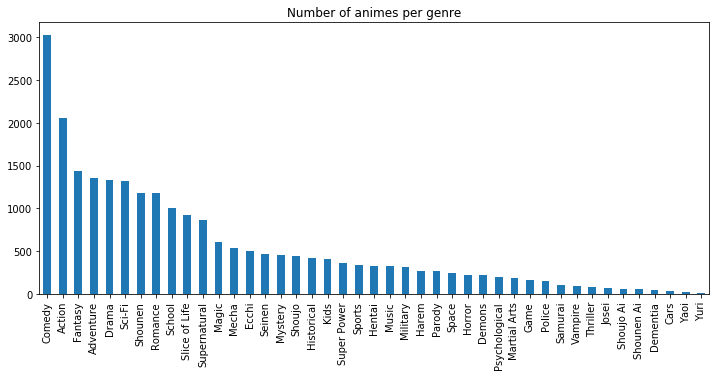

In [10]:
genres_count.plot.bar(figsize=(12,5), title='Number of animes per genre')

In [11]:
sorted_by_favorites = anime_clean_split_genre.sort_values('favorites', ascending=False)

In [12]:
TOP_N = 50
top_animes_per_genre = {}

for genre in genres_count.index:
    top_animes_per_genre[genre] = sorted_by_favorites[sorted_by_favorites.genre == genre].index[:TOP_N]

In [13]:
top_animes_per_genre['Comedy']

Index(['Fullmetal Alchemist: Brotherhood', 'One Piece',
       'Tengen Toppa Gurren Lagann', 'Clannad: After Story',
       'Naruto: Shippuuden', 'Bleach', 'Cowboy Bebop', 'Fairy Tail',
       'Angel Beats!', 'Toradora!', 'Naruto', 'Gintama', 'No Game No Life',
       'One Punch Man', 'Ouran Koukou Host Club', 'Haikyuu!!', 'Clannad',
       'Kill la Kill', 'Fullmetal Alchemist', 'Dragon Ball Z',
       'Boku no Hero Academia', 'Kuroshitsuji', 'Samurai Champloo', 'Noragami',
       'Sakurasou no Pet na Kanojo', 'Soul Eater', 'Baccano!', 'FLCL',
       'NHK ni Youkoso!', 'Kuroko no Basket', 'Kaichou wa Maid-sama!',
       'Great Teacher Onizuka', 'Suzumiya Haruhi no Yuuutsu',
       'Yahari Ore no Seishun Love Comedy wa Machigatteiru.',
       'Katekyo Hitman Reborn!', 'Kono Subarashii Sekai ni Shukufuku wo!',
       'K-On!', 'High School DxD', 'Nichijou', 'Nana', 'InuYasha',
       'D.Gray-man', 'Monogatari Series: Second Season',
       'Boku no Hero Academia 2nd Season', 'Yuri!!! on I

In [14]:
representative_anime = {}

for genre in genres_count.index:
    idx = 0
    while top_animes_per_genre[genre][idx] in representative_anime.values():
        idx += 1
    representative_anime[genre] = top_animes_per_genre[genre][idx]

In [15]:
representative_anime

{'Comedy': 'Fullmetal Alchemist: Brotherhood',
 'Action': 'One Piece',
 'Fantasy': 'Shingeki no Kyojin',
 'Adventure': 'Hunter x Hunter (2011)',
 'Drama': 'Code Geass: Hangyaku no Lelouch',
 'Sci-Fi': 'Steins;Gate',
 'Shounen': 'Death Note',
 'Romance': 'Sword Art Online',
 'School': 'Shigatsu wa Kimi no Uso',
 'Slice of Life': 'Clannad: After Story',
 'Supernatural': 'Bleach',
 'Magic': 'Fairy Tail',
 'Mecha': 'Tengen Toppa Gurren Lagann',
 'Ecchi': 'No Game No Life',
 'Seinen': 'One Punch Man',
 'Mystery': 'Tokyo Ghoul',
 'Shoujo': 'Ouran Koukou Host Club',
 'Historical': 'Gintama',
 'Kids': 'Pokemon',
 'Super Power': 'Code Geass: Hangyaku no Lelouch R2',
 'Sports': 'Haikyuu!!',
 'Hentai': 'Boku no Pico',
 'Music': 'K-On!',
 'Military': 'Fullmetal Alchemist',
 'Harem': 'High School DxD',
 'Parody': 'FLCL',
 'Space': 'Cowboy Bebop',
 'Horror': 'Elfen Lied',
 'Demons': 'Kuroshitsuji',
 'Psychological': 'Neon Genesis Evangelion',
 'Martial Arts': 'Naruto: Shippuuden',
 'Game': 'Death Pa

In [16]:
image_per_genre = {}

for genre in genres_count.index:
    represent = representative_anime[genre]
    image_per_genre[genre] = anime_clean_data.loc[represent].image_url.replace('myanimelist.cdn-dena.com', 'cdn.myanimelist.net')

In [17]:
image_per_genre

{'Comedy': 'https://cdn.myanimelist.net/images/anime/5/47421.jpg',
 'Action': 'https://cdn.myanimelist.net/images/anime/6/73245.jpg',
 'Fantasy': 'https://cdn.myanimelist.net/images/anime/10/47347.jpg',
 'Adventure': 'https://cdn.myanimelist.net/images/anime/11/33657.jpg',
 'Drama': 'https://cdn.myanimelist.net/images/anime/5/50331.jpg',
 'Sci-Fi': 'https://cdn.myanimelist.net/images/anime/5/73199.jpg',
 'Shounen': 'https://cdn.myanimelist.net/images/anime/9/9453.jpg',
 'Romance': 'https://cdn.myanimelist.net/images/anime/11/39717.jpg',
 'School': 'https://cdn.myanimelist.net/images/anime/3/67177.jpg',
 'Slice of Life': 'https://cdn.myanimelist.net/images/anime/13/24647.jpg',
 'Supernatural': 'https://cdn.myanimelist.net/images/anime/3/40451.jpg',
 'Magic': 'https://cdn.myanimelist.net/images/anime/5/18179.jpg',
 'Mecha': 'https://cdn.myanimelist.net/images/anime/4/5123.jpg',
 'Ecchi': 'https://cdn.myanimelist.net/images/anime/5/65187.jpg',
 'Seinen': 'https://cdn.myanimelist.net/image

In [43]:
data_per_genre = []

for genre in genres_count.index:
    data_per_genre.append({
        "name": genre,
        "count": int(genres_count[genre]),
        "representative_anime": representative_anime[genre],
        "image": image_per_genre[genre]
    })

In [44]:
with open('genre_data.json', 'w') as outfile:
    json.dump(data_per_genre, outfile)

In [32]:
anime_clean_data.score

title
Inu x Boku SS                                                 7.63
Seto no Hanayome                                              7.89
Shugo Chara!! Doki                                            7.55
Princess Tutu                                                 8.21
Bakuman. 3rd Season                                           8.67
                                                              ... 
Dokidoki Little Ooyasan                                       9.52
Wo Shi Jiang Xiaobai (2018)                                   0.00
Genki Genki Non-tan: Obake Mura Meiro                         4.20
Mr. Men Little Miss                                           4.57
Mushi Mushi Mura no Nakama-tachi: Minna Ii Toko Arun Da yo    7.00
Name: score, Length: 6664, dtype: float64

In [33]:
columns_of_interest = ['anime_id', 'image_url', 'type', 'source',
                       'episodes', 'aired_string', 'duration',
                       'score', 'favorites',
                       'producer', 'licensor', 'studio', 'genre']

In [34]:
anime_clean_data_interest = anime_clean_data[columns_of_interest].fillna("")

In [35]:
top_animes_data_per_genre = {}
for genre in genres_count.index:
    genre_top_animes = top_animes_per_genre[genre]
    top_animes_data_per_genre[genre] = anime_clean_data_interest.loc[genre_top_animes].reset_index().to_dict(orient="records")

In [36]:
with open('genre_top_animes_data.json', 'w') as outfile:
    json.dump(top_animes_data_per_genre, outfile)